<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/Ejercicio1_MB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras Workshop 1**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 03/18/24

𝝮

NOTE: The original workshop was taught in Spanish.

El objetivo de este ejercicio es implementar una red neuronal multicapa, únicamente para clasificar los dígitos 0 y 1 de la base de datos MNIST.

__Objetivos:__
* Implementar una red neuronal en Keras, para un problema de clasificación binaria.
* Aprender el uso de la función de pérdida 'binary_crossentropy'.
* Experimentar con distintos métodos de optimización.
* Experimentar con distintas funciones de activación.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

# new confusion matrix
from pandas import DataFrame
import tensorflow as tf
import seaborn as sns

In [ ]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# colectar los dígitos 0 y 1
tr0 = np.where(train_labels==0)[0]
tr1 = np.where(train_labels==1)[0]
ts0 = np.where(test_labels==0)[0]
ts1 = np.where(test_labels==1)[0]
tr_idx = np.hstack([tr0, tr1])
ts_idx = np.hstack([ts0, ts1])

# nuevo sub-conjunto de datos
train_images = train_images[tr_idx]
train_labels = train_labels[tr_idx]
test_images = test_images[ts_idx]
test_labels = test_labels[ts_idx]

In [ ]:
print('train images shape:', train_images.shape)
print('train labels shape:', train_labels.shape)
print('test images shape:', test_images.shape)
print('test labels shape:', test_labels.shape)

train images shape: (12665, 28, 28)
train labels shape: (12665,)
test images shape: (2115, 28, 28)
test labels shape: (2115,)


Ahora, el conjunto sólo tiene 12665 datos de entrenamiento, y 2115 datos de prueba.

In [ ]:
# pre-procesamiento de los datos
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [ ]:
print(data_shape)

(784,)


## Diseño de la red

__Ejercicio:__ Diseñe una red neuronal con varias capas ocultas, más una capa de salida (como en la figura). Las capas deben ser densas.

¿Cuántas neuronas debe tener la capa de salida?

**R = 2**

Experimente con diferente número de capas (no demasiadas, entre 1 y 5).

**4 layers used**

Experimente con diferente número de neuronas en las capas ocultas (puede usar potencias de 2 si lo prefiere).

**shape = [784, 512, 256, 128, 64, 2]**

Experimente con diferentes funciones de activación en las capas ocultas (e.g. 'relu', 'tanh', 'sigmoid', None).

**ReLU used**

Por ser clasificación binaria, en la capa de salida puede usar la activación 'sigmoid'. Si lo desea, puede experimentar con otras funciones de activación.

**Sigmoid used**

In [ ]:
### START CODE HERE ### (≈ 3-7 lines of code)
network = models.Sequential()
network.add(layers.Dense(units = 512, activation = 'relu', input_shape = data_shape, name = 'dense0'))
network.add(layers.Dense(units = 256, activation = 'relu', name = 'dense1'))
network.add(layers.Dense(units = 128, activation = 'relu', name = 'dense2'))
network.add(layers.Dense(units = 64, activation = 'relu', name = 'dense3'))
network.add(layers.Dense(units = 2, activation = 'sigmoid', name = 'out'))
### END CODE HERE ###

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense0 (Dense)              (None, 512)               401920    
                                                                 
 dense1 (Dense)              (None, 256)               131328    
                                                                 
 dense2 (Dense)              (None, 128)               32896     
                                                                 
 dense3 (Dense)              (None, 64)                8256      
                                                                 
 out (Dense)                 (None, 2)                 130       
                                                                 
Total params: 574530 (2.19 MB)
Trainable params: 574530 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Tests**

In [ ]:
network2 = tf.keras.models.clone_model(network) # clone architecture with new weights
network2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense0 (Dense)              (None, 512)               401920    
                                                                 
 dense1 (Dense)              (None, 256)               131328    
                                                                 
 dense2 (Dense)              (None, 128)               32896     
                                                                 
 dense3 (Dense)              (None, 64)                8256      
                                                                 
 out (Dense)                 (None, 2)                 130       
                                                                 
Total params: 574530 (2.19 MB)
Trainable params: 574530 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__Ejercicio:__ Compile y entrene la red neuronal. Como es un problema de clasificación binaria (0 ó 1), utilice como función de pérdida 'binary_crossentropy'

Utilice el optimizador 'RMSprop' con un learning rate apropiado. Consulte la documentación de Keras y utilice otros optimizadores (e.g. 'sgd', 'adam', 'adagrad', 'adadelta', 'adamax').

Experimente cambiando diferentes valores para learning rate (e.g. 0.1, 0.05, 0.01, ...) Estos valores pueden cambiar, dependiendo del optimizador que se use.

Experimente cambiando tamaños de batch entre 1 y 256 (se sugiere usar potencias de 2).

Finalmente, compare sus modelos y determine cuál tiene el menor error de clasificación (mayor accuracy).

In [ ]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.RMSprop(learning_rate = 0.001)
network.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###


### START CODE HERE ### (≈ 3 lines of code)
tic = time()
history = network.fit(train_images, train_labels, epochs = 15, batch_size = 256, validation_split = 0.16666) #same validation split as examples
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/15
42/42 [==============================] - 3s 39ms/step - loss: 0.0430 - accuracy: 0.9836 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 2/15
42/42 [==============================] - 1s 26ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 3/15
42/42 [==============================] - 1s 25ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 4/15
42/42 [==============================] - 1s 21ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 5/15
42/42 [==============================] - 1s 25ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0127 - val_accuracy: 0.9957
Epoch 6/15
42/42 [==============================] - 1s 25ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 7/15
42/42 [==============================] - 1s 26ms/step - loss: 3.9098e-04 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 8/1

**Other tests**

In [ ]:
opt = optimizers.Adam(learning_rate = 0.001)
network2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

tic = time()
history2 = network2.fit(train_images, train_labels, epochs = 15, batch_size = 256, validation_split = 0.16666)
print('total training time:', time()-tic, 'seconds')

Epoch 1/15
42/42 [==============================] - 3s 30ms/step - loss: 0.0624 - accuracy: 0.9846 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 2/15
42/42 [==============================] - 1s 24ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0064 - val_accuracy: 0.9976
Epoch 3/15
42/42 [==============================] - 1s 14ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 4/15
42/42 [==============================] - 1s 14ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 5/15
42/42 [==============================] - 1s 14ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9991
Epoch 6/15
42/42 [==============================] - 1s 14ms/step - loss: 1.3272e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 7/15
42/42 [==============================] - 1s 15ms/step - loss: 6.3414e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9991
Epoch

### Ver el historial de desempeño de la red

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

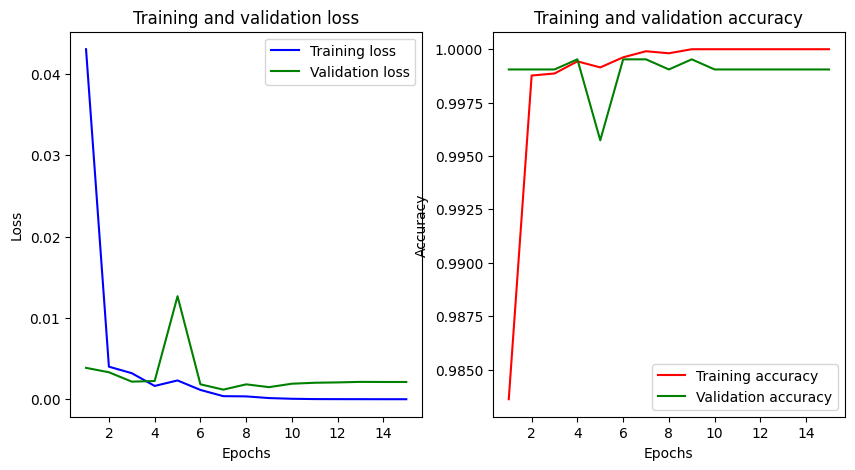

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Compare tests**

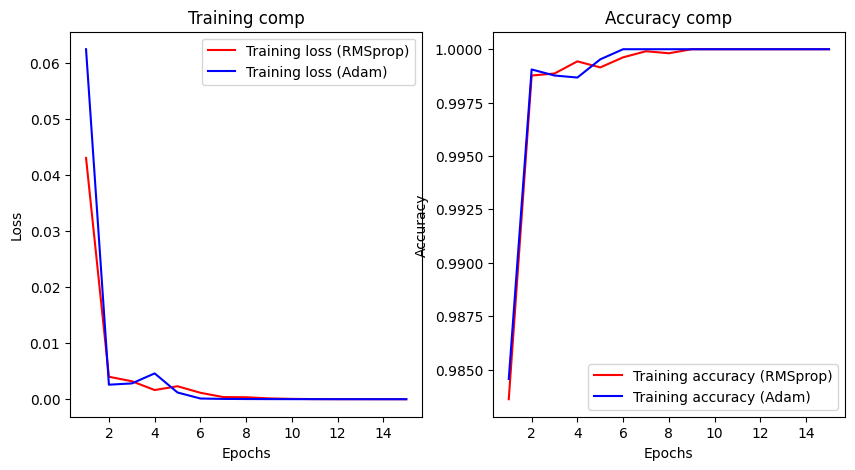

In [ ]:
acc2 = history2.history['accuracy']
loss2 = history2.history['loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss (RMSprop)')
plt.plot(epochs, loss2, 'b', label='Training loss (Adam)')
plt.title('Training comp')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy (RMSprop)')
plt.plot(epochs, acc2, 'b', label='Training accuracy (Adam)')
plt.title('Accuracy comp')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [ ]:
results = network.evaluate(test_images, test_labels)
print('results loss:', results[0])
print('results accuracy:', results[1])

67/67 [==============================] - 0s 2ms/step - loss: 8.8623e-04 - accuracy: 0.9995
results loss: 0.0008862339309416711
results accuracy: 0.9995272159576416


67/67 [==============================] - 0s 2ms/step


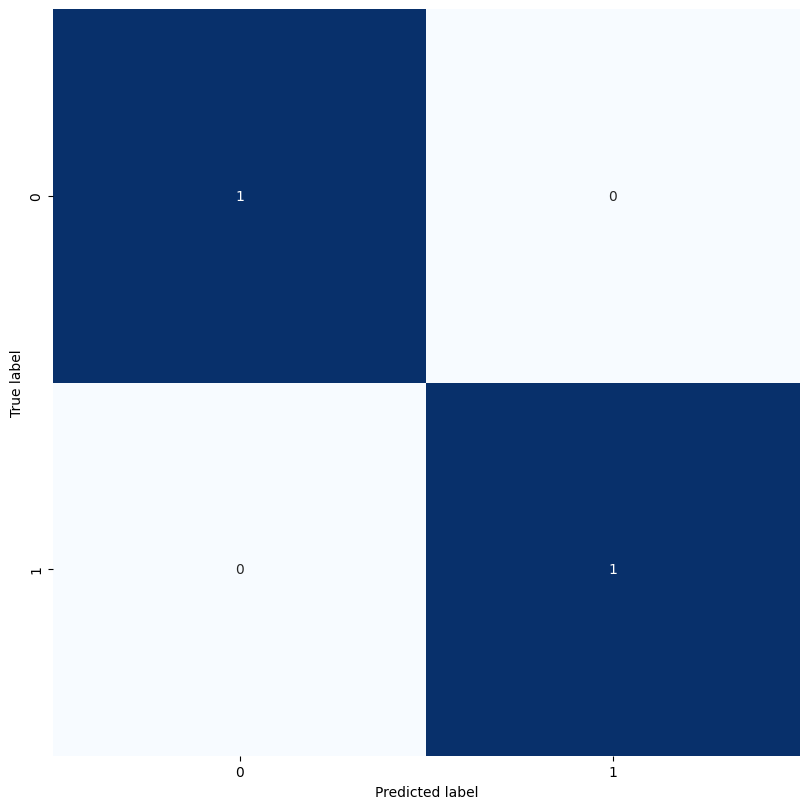

In [ ]:
pred = network.predict(test_images)
predictions = np.argmax(pred, 1)

test_labs = np.argmax(test_labels, 1)
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

67/67 [==============================] - 0s 4ms/step


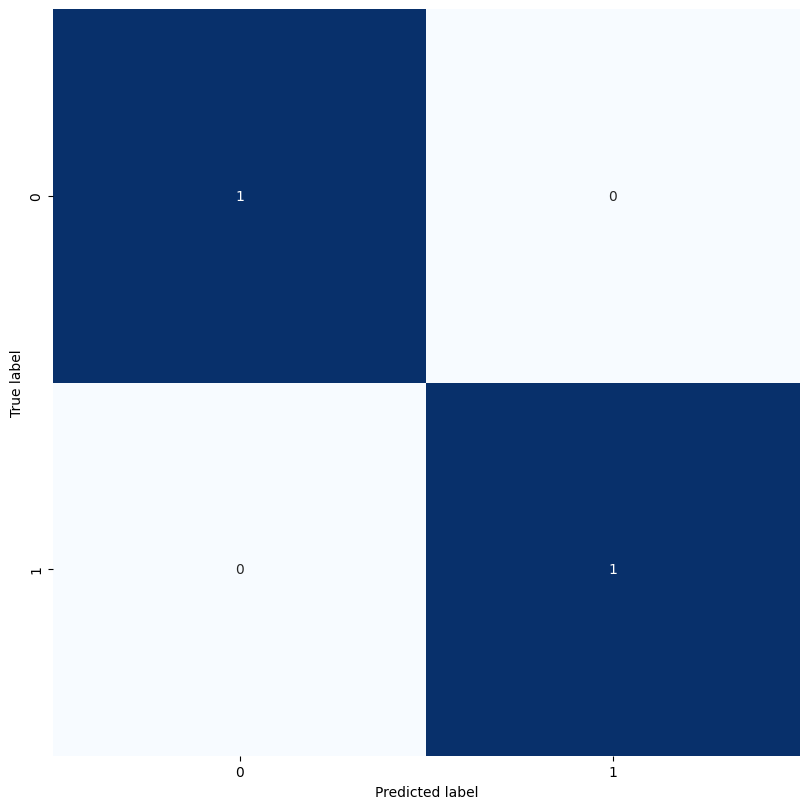

In [ ]:
pred2 = network2.predict(test_images)
predictions2 = np.argmax(pred, 1)

test_labs = np.argmax(test_labels, 1)
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions2).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

---

---

## Conclusions


The evolution of artificial intelligence, and more specifically, the tools developed to use these models, is a testament to human ingenuity and the ever-faster pace of scientific progress. 20 years ago, being able to create, train, and fine-tune a model from scratch was a huge achievement, and now almost anyone with a computer can play around with neural networks (NN). However, even though harnessing such powerful concepts is easier than ever, this does not make solving problems with AI trivial. Even for such small tasks, one has to carefully take into consideration steps such as hyperparameter tuning, the preprocessing of the data, and finding the right architecture for the job. I'm excited to keep learning and gaining experience to better understand, justify, and apply such steps in future work.